In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2023-02-16 17:03:02.322888


# Matplotlib - osa 3
## Histogrammi

Tämä on jatkoa sarjan kahdelle edelliselle osalle:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

Käytän seuraavissa akselin jakoviivojen (ticks) sijoittelun ja ulkoasun tuunausta **matplotlib.ticker**-kirjaston toiminnoilla. Lue lisää https://matplotlib.org/stable/api/ticker_api.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Tätä tarvitsen akselien tuunaamiseen
import matplotlib.ticker as ticker

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Histogrammi

Histogrammia käytetään määrällisen muuttujan luokitellun jakauman esittämiseen. Histogrammissa pylväät ovat kiinni toisissaan. Voin erottaa pylväät toisistaan reunaviivalla (**edgecolor='white'**).

Oletuksena histogrammi jakaa muuttujan arvot kymmeneen luokkaan.

Seuraavassa tallennan kaavion muuttujan **ax1** arvoksi, jotta voin viitata kaavioon käyttäessäni **set_major_locator**-toimintoa.

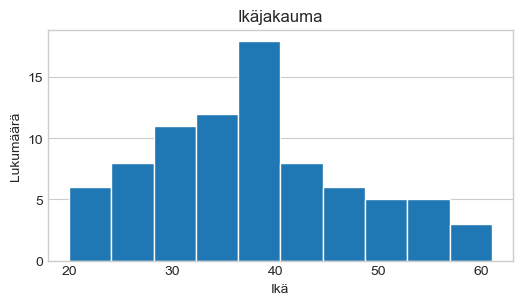

In [4]:
ax1 = df['ikä'].plot.hist(figsize=(6,3), edgecolor='white')

plt.title('Ikäjakauma')
plt.ylabel('Lukumäärä')
plt.xlabel('Ikä')

plt.grid(axis = 'x')

# Tuunaan y-akselin näyttämään arvot viiden välein
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))

Seuraavassa viimeistellympi histogrammi, jossa määrään käytettäväksi kuutta luokkaa (**bins = 6**).

Lukumäärien sijasta arvoakselilla on prosentit, joiden laskemiseen käytän **np.ones()**-kikkaa:
* Annan arvoille painokertoimet **weights**-lisäparametrina.
* **np.ones(n)** tuottaa alkuperäisten arvojen sijasta pelkkiä ykkösiä. Kun ykkösen suuruisia arvoja summataan käyttäen painokertoimina 1/n, niin saadaan prosentteja.
* Kertomalla sadalla saadaan desimaalimuotoiset prosentit prosenttiluvuiksi.

(0.0, 35.0)

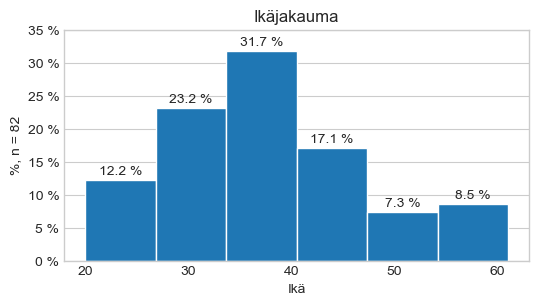

In [5]:
# Ikään liittyvien havaintojen lukumäärä
n = df['ikä'].count()

ax2 = df['ikä'].plot.hist(figsize=(6,3), bins=6, weights=np.ones(n)/n*100, edgecolor='white')

plt.title('Ikäjakauma')
plt.ylabel('%, n = ' + str(n))
plt.xlabel('Ikä')

plt.grid(axis='x')

for bar_container in ax2.containers:
    ax2.bar_label(bar_container, padding=2, fmt='%.1f %%')

ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# %-merkit lukujen perään
ax2.yaxis.set_major_formatter(ticker.FuncFormatter('{:.0f} %'.format))

plt.ylim(0, 35)

Tarvittaessa voin käyttää epätasavälisiä luokkia. Tällöin määritän luokkarajat (**bins**) itse.

Havainnollisuuden parantamiseksi asetan x-akselin jakoviivat luokkarajojen kohdille (**plt.xticks(bins)**).

Huomaa, että epätasavälistä luokittelua käytettäessä pylvään leveys riippuu luokan leveydestä.

(0.0, 40.0)

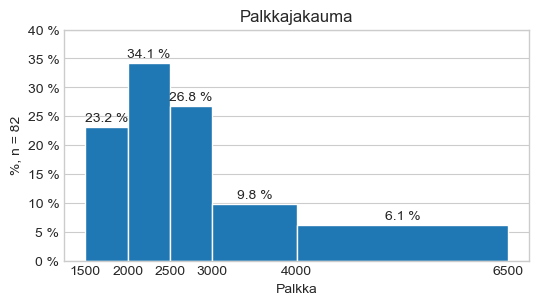

In [6]:
n = df['palkka'].count()
bins = [1500, 2000, 2500, 3000, 4000, 6500]

ax3 = df['palkka'].plot.hist(figsize=(6,3), bins=bins, weights=np.ones(n)/n*100, edgecolor='white')

plt.title('Palkkajakauma')
plt.ylabel('%, n = ' + str(n))
plt.xlabel('Palkka')
plt.xticks(bins)
plt.grid(axis='x')

for bar_container in ax3.containers:
    ax3.bar_label(bar_container, padding=2, fmt='%.1f %%')

ax3.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax3.yaxis.set_major_formatter(ticker.FuncFormatter('{:.0f} %'.format))
plt.ylim(0, 40)

## Lisätietoa

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb käsittelee värien ja värikarttojen käyttöä